In [1]:
%pwd


u'/Users/jm/Onedrive/projects/python/adversarial_experiments/nbs'

In [2]:
%cd ..


/Users/jm/Onedrive/projects/python/adversarial_experiments


In [ ]:
%cd adv


In [ ]:
%ls -la models


In [ ]:
%run main.py -ds mnist -m mlp -pr True -sc 1 -pv 1234 -eps 0.3


In [ ]:
print(np.max(trX))
print(np.max(teX))
np.save('adv_data/cnn_adv', X_test_adv)


In [ ]:
%run main.py -ds mnist -m cnn_model -pr True -sc 1 -pv 1234 -eps 0.3


In [ ]:
print(np.max(trX))
print(np.max(teX))


In [ ]:
%run main.py -ds cifar10 -m cnn_model -pr True -sc 1 -pv 1234 -eps 0.3

In [ ]:
print(np.max(trX))
print(np.max(teX))

In [ ]:
%run main.py -ds mnist -m conv_ae -pr True -sc 1 -pv 1234 -eps 0.3

In [ ]:
print(np.max(trX))
print(np.max(teX))

In [ ]:
%run main.py -ds mnist -m resnet -pr True -sc 1 -pv 1234 -eps 0.3

In [ ]:
print(np.max(trX))
print(np.max(teX))

In [ ]:
%run main.py -ds mnist -m irnn -pr True -sc 1 -pv 1234 -eps 0.3

In [ ]:
print(np.max(trX))
print(np.max(teX))

In [ ]:
%run main.py -ds mnist -m hierarchical -pr True -sc 1 -pv 1234 -eps 0.3

In [ ]:
print(np.max(trX))
print(np.max(teX))

In [ ]:
print teX.shape
print X_test_adv.shape
print teY.shape
print trY.shape
from utils import plot_img_diff
plot_img_diff(np.squeeze(teX[1234]), np.squeeze(teX[1234]), 'test')


In [3]:
from keras.models import load_model
from keras.utils import np_utils
from keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [4]:
(trX, trY), (teX, teY) = mnist.load_data()
teX = np.float32(teX / 255.)
teX = teX.reshape(-1, 28,28,1)
trX = np.float32(trX / 255.)
trX = trX.reshape(-1, 28,28,1)
trY = np_utils.to_categorical(trY, 10)
teY = np_utils.to_categorical(teY, 10)
X_test_adv = np.load('adv_data/conv_ae_mnist_adv.npy')
print(trX.shape, np.max(trX))
print(teX.shape)


((60000, 28, 28, 1), 1.0)
(10000, 28, 28, 1)


In [ ]:
(trX, trY), (teX_cifar, teY_cifar) = cifar10.load_data()
teX_cifar = np.float32(teX_cifar / 255.)
trX = np.float32(trX / 255.)
teX_cifar = teX_cifar.reshape(-1, 32*32*3)
trX = trX.reshape(-1, 32*32*3)
X_test_adv = np.load('adv_data/X_test_adv_cifar.npy')
# X_test_adv = X_test_adv.reshape(-1, 32 * 32 * 3)
# from keras.datasets import cifar10
# (trX, trY), (teX, teY) = cifar10.load_data()
print(trX.shape, np.max(trX))

In [ ]:
from utils import plot_kde

In [ ]:
plot_kde(teX)

In [ ]:
plot_kde(X_test_adv)

In [ ]:
plot_kde(teX_cifar)

In [ ]:
plot_kde(X_test_adv.reshape(-1, 32*32*3))

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('images/density-mnist.png')
img2 = plt.imread('images/density-mnist-adv.png')
img3 = plt.imread('images/density-cifar.png')
img4 = plt.imread('images/density-cifar-adv.png')
print(img1.shape, img2.shape, img3.shape, img4.shape)
plt.subplot(121)
plt.imshow(img1)
plt.axis('off')
plt.subplot(122)
plt.imshow(img3)
# plt.subplot(223)
# plt.subplot(img2)
# plt.subplot(224)
# plt.imshow(img4)
plt.axis('off')
plt.show()

In [5]:
res = load_model('models/test_res.hdf5')

/Users/jm/anaconda2/envs/adversarial/lib/python2.7/site-packages/keras/engine/topology.py:1242: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)




Testing model MLP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               

utils.py:37: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Users/jm/anaconda2/envs/adversarial/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jm/anaconda2/envs/adversarial/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
 9920/10000 [============================>.] - ETA: 0s
model = MLP, mean = 0.998599980379, std = 0.000688058354347, legit test acc. = 0.9839, adv. test acc. = 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       592
          1       1.00      1.00      1.00       674
          2       1.00      1.00      1.00       595
          3       1.00      1.00      1.00       613
          4       1.00      1.00      1.00       584
          5       1.00      1.00      1.00       542
          6       1.00      1.00      1.00       591
          7       1.00      1.00      1.00       626
          8       1.00      1.00      1.00       585
          9       1.00      1.00      1.00       594

avg / total       1.00      1.00      1.00      5996



utils.py:49: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)


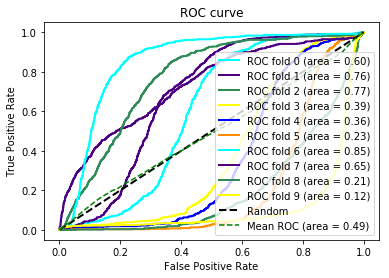



Testing model CNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        

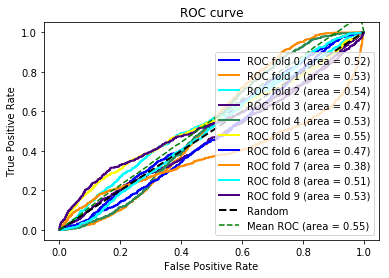



Testing model AE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0

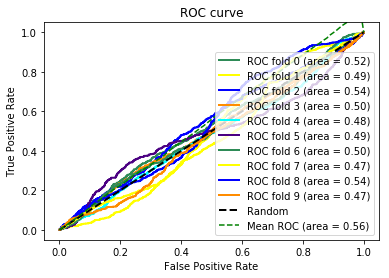



Testing model RNet

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 28, 28, 16)    160         input_2[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 28, 28, 16)    64          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 28, 28, 16)    0           batch_normalization_1[0][0]      
_____________________________________________________________________

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
10000/10000 [==============================] - 66s    

model = RNet, mean = 0.930232811351, std = 0.00330520610939, legit test acc. = 0.9379, adv. test acc. = 
             precision    recall  f1-score   support

          0       0.97      0.93      0.95       592
          1       0.96      0.98      0.97       674
          2       0.91      0.93      0.92       595
          3       0.96      0.91      0.93       613
          4       0.98      0.93      0.96       584
          5       0.88      0.94      0.91       542
          6       0.95      0.95      0.95       591
          7       0.96      0.94      0.95       626
          8       0.90      0.90      0.90       585
          9       0.88      0.93      0.90       594

avg / total       0.94      0.93      0.93      5996



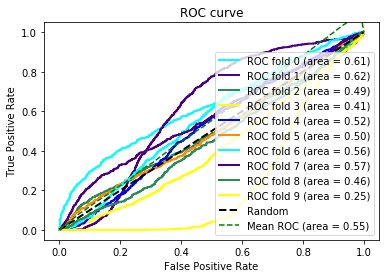



Testing model HRNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 28, 256)           264192    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               279552    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,071,626
Trainable params: 1,071,626
Non-trainable params: 0
____________________________________________

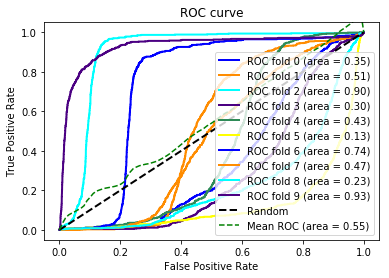



Testing model iRNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 784)               616224    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 625)               408750    
_________________________________________________________________
reshape_2 (Reshape)          (None, 25, 25)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 256)               72192     
_________________________________________________________________
reshape_3 (Reshape)          (None, 16, 16)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 100)              

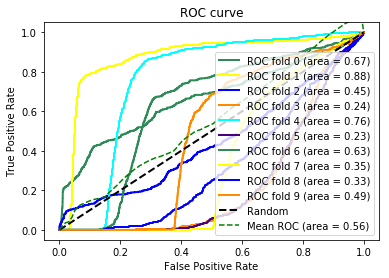

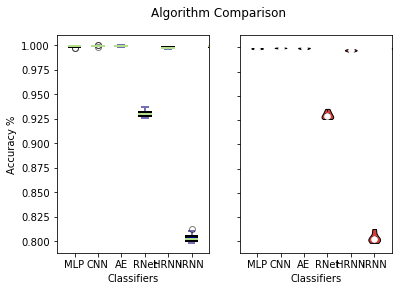

In [6]:
# from models import mlp, cnn, conv_ae
# mlp = mlp((2,))
# cnn = cnn((2,))
# cnn.summary()
# ae = conv_ae((2,))
# mod.summary()
mlp = load_model('models/mlp_mnist.hdf5')
cnn = load_model('models/cnn_mnist.hdf5')
ae = load_model('models/conv_ae_mnist.hdf5')
# teX = teX + np.random.randn(teX.shape[0], 28, 28, 1)
# plt.imshow(np.squeeze(X_test_adv[1234]), cmap=plt.cm.inferno)
# plt.show()
# ae.evaluate(teX, teY)
# resnet = load_model('models/test_res.hdf5')
hrnn = load_model('models/hrnn_mnist.hdf5')
irnn = load_model('models/irnn_mnist.hdf5')
# resnet.summary()
# model.summary()
models = [("MLP", mlp),
         ("CNN", cnn),
         ("AE", ae),
         ("RN", res),
         ("HR", hrnn),
         ("RNN", irnn)]
from utils import rank_classifiers
rank_classifiers(models, trX, trY, teX, teY, X_test_adv, pretrained=True)
# from utils import plot_classifier_boundary
# plot_classifier_boundary(teX, teY, models)

In [ ]:
%pwd

In [ ]:
from utils import find_top_predictions
model = load_model('models/conv_ae_mnist.hdf5')
model.summary()
imgs, ind = find_top_predictions(model, teX, teY, X_test_adv, 7, img_row=28, img_col=28, img_chn=1)


In [ ]:
# imgs[6] = imgs[6] / 255.
# imgs = np.load('../adv_imgs.npy')
print(np.max(imgs))
# np.save('adv_imgs', imgs)
# imgs_vis = imgs.copy()
print(len(ind))
print(imgs[2].shape)
print(ind[2])
plt.imshow(teX[np.int32(ind[2])].reshape(28, 28))
plt.show()
# plt.imshow(trX[np.int32(ind[0])].reshape(28, 28))
# plt.show()

In [ ]:
from utils import denoising_dictionary_learning
recons = denoising_dictionary_learning(teX[np.int32(ind[1])].reshape(28, 28), X_test_adv[np.int32(ind[1])].reshape(28, 28))


In [ ]:
recons.keys()
recon_img = recons['OMP\n38 atoms']
np.argmax(model.predict(recon_img.reshape(1, 28, 28, 1)), axis=1)

In [ ]:
from utils import tsne, plot_2d_embedding
if teX.ndim >= 3 and X_test_adv.ndim >= 3 and teX_cifar.ndim >= 3:
    teX = teX.reshape(-1, np.prod(teX.shape[1:]))
    X_test_adv = X_test_adv.reshape(-1, np.prod(X_test_adv.shape[1:]))
    teX_cifar = teX_cifar.reshape(-1, np.prod(teX_cifar.shape[1:]))
print teX.shape, teX_cifar.shape
# teX_emb = tsne(teX)
# teX_cifar_emb = tsne(teX_cifar)
np.save('teX_emb', teX_emb)
np.save('teX_cifar_emb', teX_cifar_emb)
fig = plt.figure(figsize=(10, 4))
ax = plt.axes(frameon=True)
plt.setp(ax, xticks=(), yticks=())
plt.subplot(121)
plt.scatter(teX_emb[:, 0], teX_emb[:, 1], c=np.argmax(teY, axis=1), marker="x")
plt.axis('off')
plt.colorbar()
plt.subplot(122)
plt.scatter(teX_cifar_emb[:, 0], teX_cifar_emb[:, 1], c=teY_cifar, marker="x")
plt.axis('off')
plt.colorbar()
plt.show()
# teX_emb_adv = tsne(X_test_adv)
# teX_emb = np.load('mlp_teX_emb.npy')
# teX_emb_adv = np.load('mlp_teX_emb_adv.npy')
# plot_2d_embedding(teX, np.argmax(teY, axis=1), teX_emb, 'MNIST test data', min_dist=None)
# plot_2d_embedding(teX, np.argmax(teY, axis=1), teX_emb_adv, 'MNIST perturbed test data', min_dist=None)


In [ ]:
import matplotlib.pyplot as plt
from utils import visualize_hypercolumns
result = visualize_hypercolumns(model, imgs[0], layers_extract=np.arange(57))
# plt.imshow(np.average(result, axis=2))
plt.imshow(result)
plt.axis('off')
plt.show()

In [ ]:
from utils import vis_cam
# vis_cam(model, imgs[0].reshape(1,784), 'dense_1', mode='dense')
np.max(imgs[3])

In [ ]:
vis_cam(model, imgs[3], 'dense_1', mode='cam', penultimate_layer_idx=57)

In [ ]:
import matplotlib.pyplot as plt
orig = teX[np.int32(ind)]
adv = X_test_adv[np.int32(ind)]
fig, axes = plt.subplots(2, len(orig))
for idx, (im, adv) in enumerate(zip(orig, adv)):
    axes[0][idx].imshow(np.squeeze(im), cmap='gray_r')
    axes[1][idx].imshow(np.squeeze(adv), cmap='gray')
plt.show()

In [ ]:
print imgs[0].shape
print np.max(imgs[5])

In [ ]:
print imgs[0].shape
print imgs[0].dtype
print np.max(imgs[0])
print np.max(teX)
print teX.dtype
print teX.shape
print np.max(X_test_adv)
print X_test_adv.shape
print X_test_adv.dtype
# import matplotlib.pyplot as plt
plt.imshow(np.squeeze(imgs[0]), cmap='gray_r')
plt.show()

In [ ]:
vis_cam(model, imgs[0], 'dense_1', mode='dense', penultimate_layer_idx=2)

In [ ]:
if np.max(teX) == 255:
    teX = np.float32(teX / 255.)
if np.max(imgs) == 255:
    imgs = np.float32(imgs / 255.)
print np.max(teX)
print teX.dtype
print teX.shape
print np.max(X_test_adv)
print X_test_adv.shape
print X_test_adv.dtype
print np.max(imgs)

In [ ]:
from keras import backend as K
K.int_shape(model.layers[2].output)[3]

In [ ]:
from grad_cam import run_gradcam
import matplotlib.pyplot as plt
grad, heat = run_gradcam(model, 'test', imgs[3], 3, 'conv2d_21')
print grad.shape, heat.shape, np.max(imgs)
plt.imshow(grad)
plt.show()
plt.imshow(heat)
plt.show()

In [ ]:
from scipy.misc import face
img = face() / 255.
img = img[250:250+28, 250:250+28, :1]
img.shape
grad, heat = run_gradcam(model, 'test', img, 7, 'conv2d_2')
print grad.shape, heat.shape, np.max(imgs)
plt.imshow(grad)
plt.show()
plt.imshow(heat)
plt.show()

In [ ]:
from utils import visualize_cmap
# targets = [6, 6, 5, 3, 5, 7, 2]
# for img, target in zip(imgs, targets):
#     visualize_cmap(model, img, layer_name='conv2d_2', target_class=target)
img = visualize_cmap(model, imgs[4], layer_name='conv2d_21', target_class=8)
plt.imshow(img)
plt.show()

In [ ]:
print np.max(imgs)

In [ ]:
from utils import visualize_hypercolumns
import matplotlib.pyplot as plt
results = np.zeros(imgs.shape[:3] + (3,))
for idx, img in enumerate(imgs):
    results[idx] = visualize_hypercolumns(model, img, layers_extract=np.arange(30))
    
fig, axes = plt.subplots(1, 7)
fig.subplots_adjust(top=1.3, right=2)
for idx, img in enumerate(results):
    axes[idx].imshow(img)
    axes[idx].axis('off')
plt.show()
# print result.shape
# print np.max(result)

In [ ]:
import matplotlib.pyplot as plt
result = visualize_hypercolumns(model, imgs[0], layers_extract=np.arange(4))
# plt.imshow(np.average(result, axis=2))
plt.imshow(result)
plt.axis('off')
plt.show()

In [ ]:
from utils import visualize_occlussion_map
occlusion = visualize_occlussion_map(model, orig[0])

In [ ]:
model.predict(np.expand_dims(teX[2434], axis=0))
# print np.max(teX)
# print np.max(imgs)

In [ ]:
from filter_vis import vis_filter
# from keras import backend as K
# K.set_learning_phase(0)
vis_filter(model, 'conv2d_21', img_width=28, img_height=28, nb_filters=64, nb_channels=1, nb_iter=500)

In [ ]:
%run main.py -ds mnist -m cnn_model -pr True -sc 1

In [ ]:
from utils import vis_cam
vis_cam(model, X_test_adv[5].reshape(1,28,28,1), 'dense_1')

In [ ]:
np.save('X_test_adv', X_test_adv)